<a href="https://colab.research.google.com/github/meliy-meyada/Tensorflow-Deep-Learning-and-Artificial-Intelligence/blob/main/TF2_0_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Tensorflow
!pip install -q tensorflow-gpu==2.8.2
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 497.9 MB 15 kB/s 
2.8.2


In [2]:
# import other lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-07-06 12:04:56--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-07-06 12:04:56 (55.8 MB/s) - ‘moore.csv’ saved [2302/2302]



In [4]:
# Load in the data
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1, 1) # Make it a 2-D array of size N x D where D = 1
Y = data[:,1]

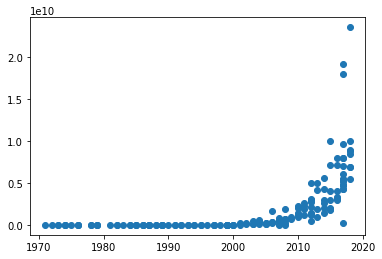

In [5]:
# plot the data - it is exponential
plt.scatter(X, Y)

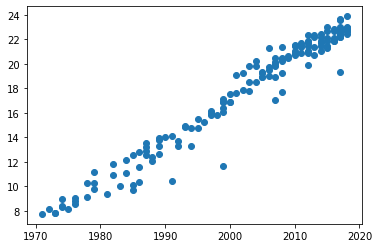

In [6]:
# Linear model
Y = np.log(Y)
plt.scatter(X, Y)

In [7]:
X = X - X.mean()

In [8]:
# Create tensorflow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
# model.compile(optimizer='adam', loss='mse')

# Learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 3ms/step - loss: 328.6417 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 355.5382 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 320.3374 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 268.3013 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 292.6029 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 242.8869 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 194.2740 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 228.4323 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 162.0338 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 123.9002 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - los

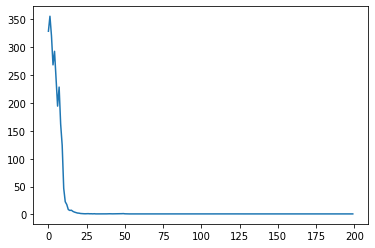

In [9]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

In [10]:
# Get the slop of the line
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.33637872]], dtype=float32), array([17.742085], dtype=float32)]


In [11]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]

In [12]:
print("Time to double: ", np.log(2) / a)

Time to double:  2.06061540869466


In [13]:
# If you know the analytical solution
X = np.array(X).flatten()
Y = np.array(Y)
denominater = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean() * X.sum() ) / denominater
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominater
print(a, b)
print("Time to double: ", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double:  2.0286295205239204
